In [326]:
import numpy as np
import cv2 as cv
import glob
import re
import matplotlib.pyplot as plt
from matplotlib.image import imread
import imutils
from imutils import contours
from imutils import perspective
import argparse
from scipy.spatial import distance as dist
import pywt


In [327]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#                help="path to the input image")
#ap.add_argument("-w", "--width", type=float, required=True,
#                help="width of the left-most object in the image (in inches)")
#args = vars(ap.parse_args())


In [328]:
imagepath = 'A:/Funciones RP/dummy img/*'


In [329]:
images = glob.glob(imagepath)


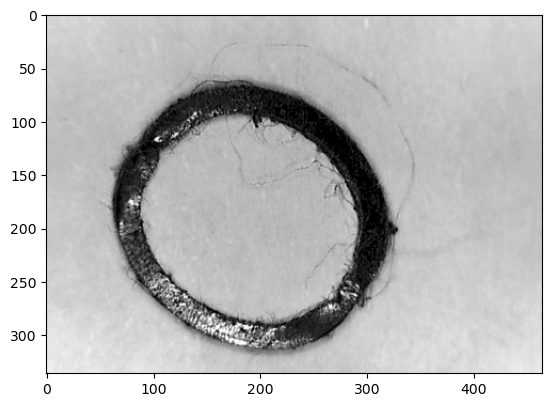

In [330]:
img = cv.imread(images[5],0)
#ret, img = cv.threshold(img, 100, 255, 0)
plt.imshow(img,cmap='gray')

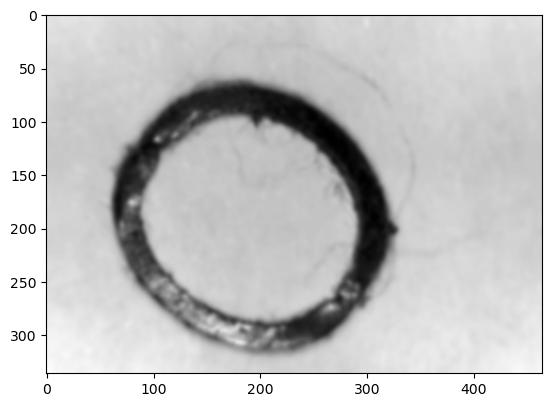

In [331]:

img = cv.GaussianBlur(img, (11,11), 0)

plt.imshow(img, cmap='gray')
plt.show()

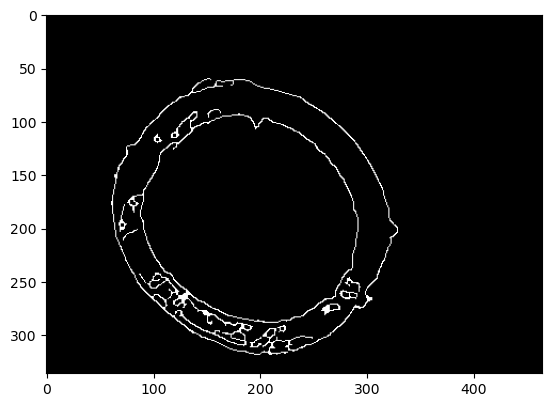

In [345]:
edged = cv.Canny(img, 50, 110)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)

plt.imshow(edged,cmap='gray')

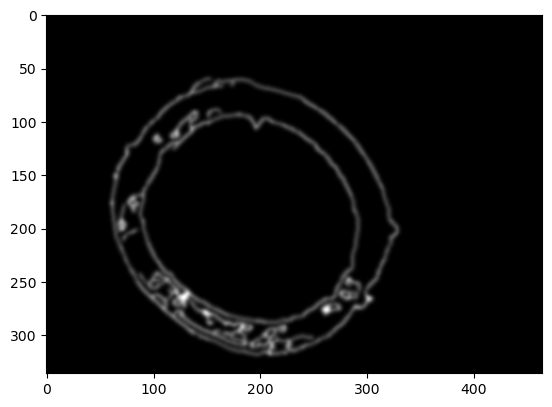

In [346]:
edged = cv.GaussianBlur(edged, (11,11), 0)
plt.imshow(edged,cmap='gray')

In [347]:
cnts, hierarchy = cv.findContours(edged.copy(),1,2)

cnts = sorted(cnts,key=len,reverse=True)

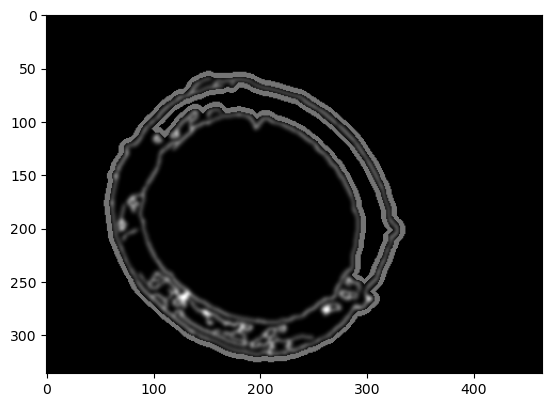

In [348]:
edged_copy = edged.copy()
c1 = cv.drawContours(edged_copy,cnts,0,(100,100,50),3)
c2 = cv.drawContours(edged_copy,cnts,1,(100,100,50),3)

plt.imshow(c1,cmap='gray')
plt.imshow(c2,cmap='gray')
plt.show()

In [342]:
cnts[0].shape

(1353, 1, 2)

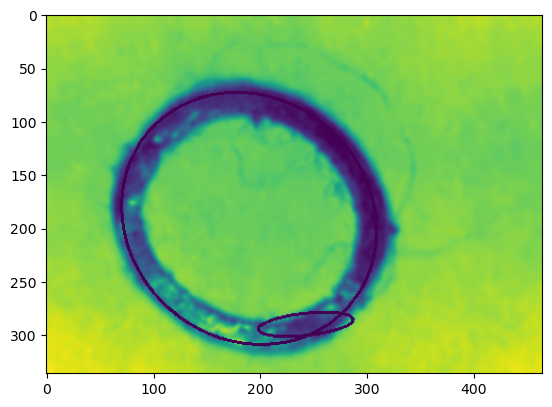

In [343]:
ellipse1 = cv.fitEllipse(cnts[0])
ellipse2 = cv.fitEllipse(cnts[1])
img_copy = img.copy()
plt.imshow(cv.ellipse(img_copy,ellipse1,(0,255,0),2))
plt.imshow(cv.ellipse(img_copy,ellipse2,(0,255,0),2))
